In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.initializers import VarianceScaling
from keras.models import load_model


from keras.datasets import mnist

In [0]:

#spliting train/test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


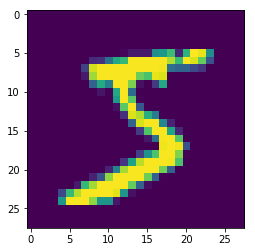

In [6]:
# Display image shape of image 
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshape image size
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert numpy array to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
#3rd sample N/W ( chaged dropout to 0.2 and #24 and #11
#Changed mxpool to 24 added,  dropout + reducing chalnnels to 16 (parmeters) )

from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.20))


model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.20))


model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(Dropout(0.20))

model.add(Convolution2D(10, 1, activation='relu')) #8
# model.add(BatchNormalization())

model.add(Convolution2D(10, 8)) #seeing 7x7 receptive fild
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2320      
__________

In [0]:
# def lr_schedule(epoch):
#     lrate = 0.01
#     if epoch > 90:
#         lrate = 0.01
#     elif epoch > 135:
#         lrate = 0.001       
#     return lrate
# LR_scheduler = LearningRateScheduler(lr_schedule)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.1419 - acc: 0.9558 - val_loss: 0.0686 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0628 - acc: 0.9806 - val_loss: 0.0383 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0513 - acc: 0.9841 - val_loss: 0.0427 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.0458 - acc: 0.9854 - val_loss: 0.0337 - val_acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0401 - acc: 0.9872 - val_loss: 0.0372 - val_acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0372 - acc: 0.9884 - val_loss: 0.0326 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0351 - acc: 0.9889 - val_loss: 0.

In [23]:
model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0277 - acc: 0.9912 - val_loss: 0.0258 - val_acc: 0.9912
Epoch 2/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0269 - acc: 0.9913 - val_loss: 0.0284 - val_acc: 0.9917
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0251 - acc: 0.9916 - val_loss: 0.0248 - val_acc: 0.9928
Epoch 4/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0242 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0253 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0243 - acc: 0.9921 - val_loss: 0.0233 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0226 - acc: 0.9923 - val_loss: 0.